In [2]:
# library import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set3')

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import statsmodels.api as spi

In [3]:
# data import

path  = '/Users/kengohirano/Desktop/Signate/Signate_competition/2023.12.11 SMBC Project/dataset/'

orig = pd.read_csv(path + 'train.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [4]:
train.head(3)

,Unnamed: 0,created_at,tree_dbh,curb_loc,health,steward,guards,sidewalk,user_type,problems,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,0,2015-06-29,14,OnCurb,1,NaN,NaN,Damage,Volunteer,NaN,...,QN45,Douglas Manor-Douglaston-Little Neck,4,4152901,Queens,Little Neck,411,11,25,23
1,1,2016-09-21,5,OnCurb,1,3or4,Helpful,NoDamage,Volunteer,NaN,...,BX05,Bedford Park-Fordham North,2,2039901,Bronx,Bronx,207,33,78,15
2,2,2015-09-13,26,OnCurb,2,NaN,NaN,NoDamage,Volunteer,StonesBranchLights,...,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5,5017011,Staten Island,Staten Island,503,24,62,51


In [5]:
test.head(3)

,Unnamed: 0,created_at,tree_dbh,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,...,nta,nta_name,borocode,boro_ct,boroname,zip_city,cb_num,st_senate,st_assem,cncldist
0,19984,2015-09-08,15,OnCurb,NaN,NaN,Damage,NYC Parks Staff,NaN,Callery pear,...,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3,3062000,Brooklyn,Brooklyn,315,22,45,48
1,19985,2015-10-15,5,OnCurb,1or2,NaN,NoDamage,Volunteer,NaN,cherry,...,BX62,Woodlawn-Wakefield,2,2045101,Bronx,Bronx,212,34,81,11
2,19986,2016-08-03,4,OnCurb,NaN,Unsure,NoDamage,Volunteer,NaN,littleleaf linden,...,QN60,Kew Gardens,4,4013800,Queens,Kew Gardens,409,14,27,29


In [6]:
# train , test 두 데이터셋 사이의 유효성을 검사

# 유효성 검사 함수 정의
def check(df):
    df_dtypes = df.dtypes
    df_nunique = df.nunique()
    df_nan = df.isna().sum()

    val_table = pd.concat([df_dtypes , df_nunique , df_nan] , axis = 1)
    val_table.columns = ['dtype' , 'nunique' , 'nan']

    return val_table.reset_index()

In [7]:
# 데이터 유효성 확인
data = pd.concat([check(train.drop(['health'] , axis = 1)) , check(test)] , axis = 1)
data.to_csv('/Users/kengohirano/Desktop/Signate/Signate_competition/2023.12.11 SMBC Project/data_table.csv' , index = False)

In [8]:
# 기술통계량 출력

train.describe()

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19984.000000,19984.000000,19984.000000,19984.000000,1.998400e+04,19984.000000,19984.000000,19984.000000,19984.000000
mean,9991.500000,11.694906,0.858036,3.360088,3.405346e+06,343.159077,21.111189,51.913981,30.346327
std,5769.028226,8.198150,0.437807,1.232246,1.239741e+06,122.264942,7.188537,18.642931,14.824068
min,0.000000,1.000000,0.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,4995.750000,5.000000,1.000000,3.000000,3.005900e+06,301.000000,15.000000,33.000000,19.000000
50%,9991.500000,9.000000,1.000000,4.000000,4.009200e+06,402.000000,22.000000,56.000000,31.000000
75%,14987.250000,17.000000,1.000000,4.000000,4.122300e+06,413.000000,25.000000,64.000000,44.000000
max,19983.000000,42.000000,2.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


In [9]:
test.describe()

,Unnamed: 0,tree_dbh,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
count,19702.000000,19702.000000,19702.000000,1.970200e+04,19702.000000,19702.000000,19702.000000,19702.000000
mean,29982.877677,11.600041,3.360319,3.406002e+06,343.219775,20.992945,51.572581,30.215714
std,5767.184780,8.206049,1.223202,1.231092e+06,121.434253,7.208765,18.671359,14.721721
min,19984.000000,1.000000,1.000000,1.000202e+06,101.000000,10.000000,23.000000,1.000000
25%,24983.250000,5.000000,3.000000,3.006200e+06,302.000000,15.000000,32.000000,19.000000
50%,29980.500000,8.000000,4.000000,4.012301e+06,402.000000,22.000000,55.000000,31.000000
75%,34982.750000,17.000000,4.000000,4.115100e+06,413.000000,25.000000,64.000000,44.000000
max,39968.000000,44.000000,5.000000,5.031902e+06,503.000000,36.000000,87.000000,51.000000


### Cardinality 확인

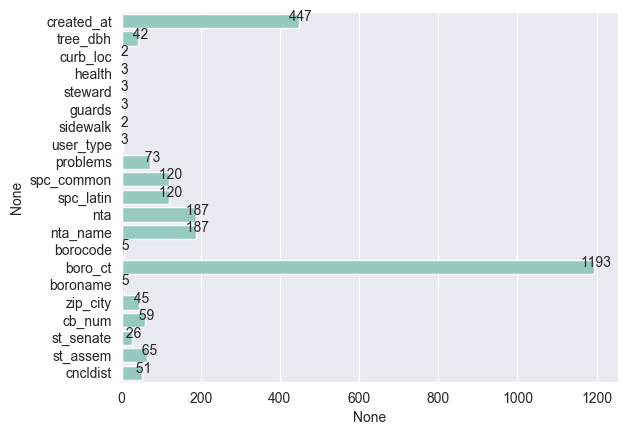

In [10]:
# 카디널리티 확인

data = train.drop(['Unnamed: 0'] , axis = 1)

g = sns.barplot(
    y = data.columns , 
    x = data.nunique()
)

for p in g.patches:
    g.text(
        p.get_x() + p.get_width() ,
        p.get_y() + (p.get_height() / 2) ,
        f"{p.get_width() : 0.0f}" ,
        ha = 'center'
    )

### 결측값 확인

<Axes: >

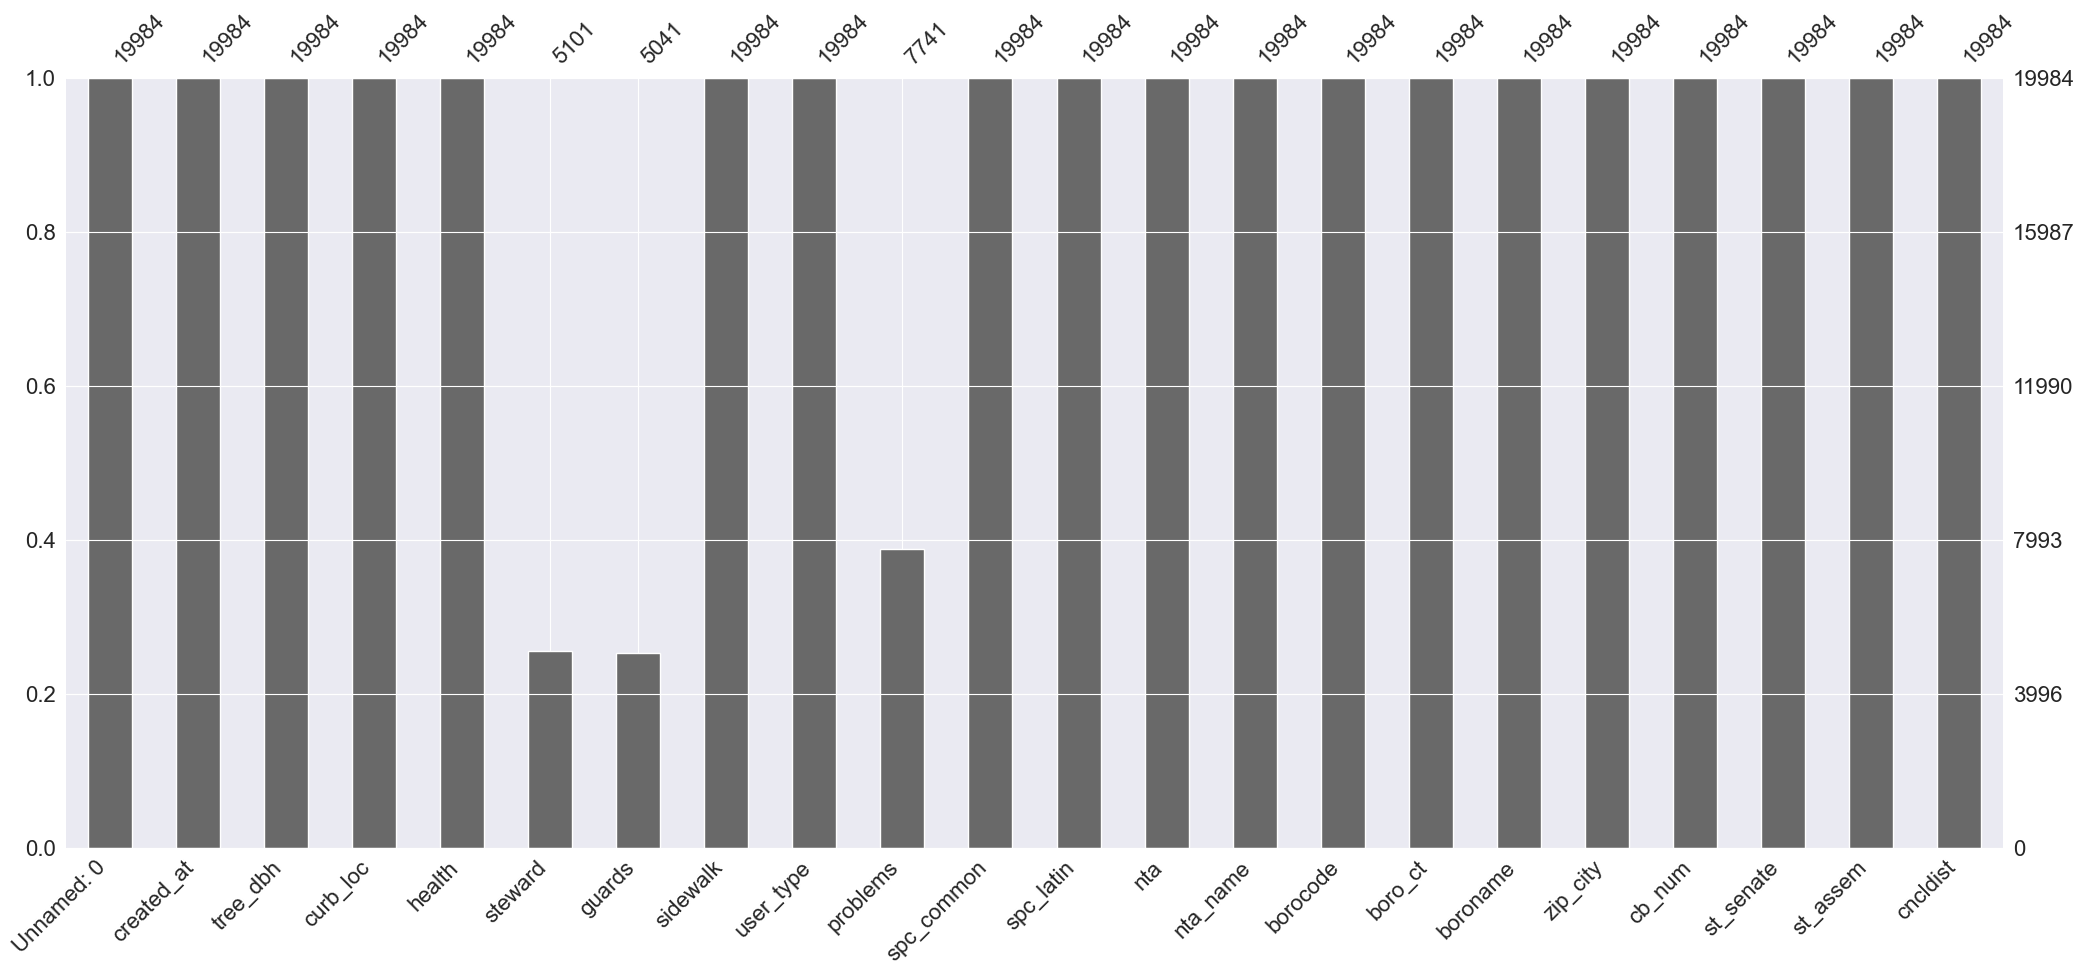

In [11]:
# 학습 데이터

msno.bar(train)

<Axes: >

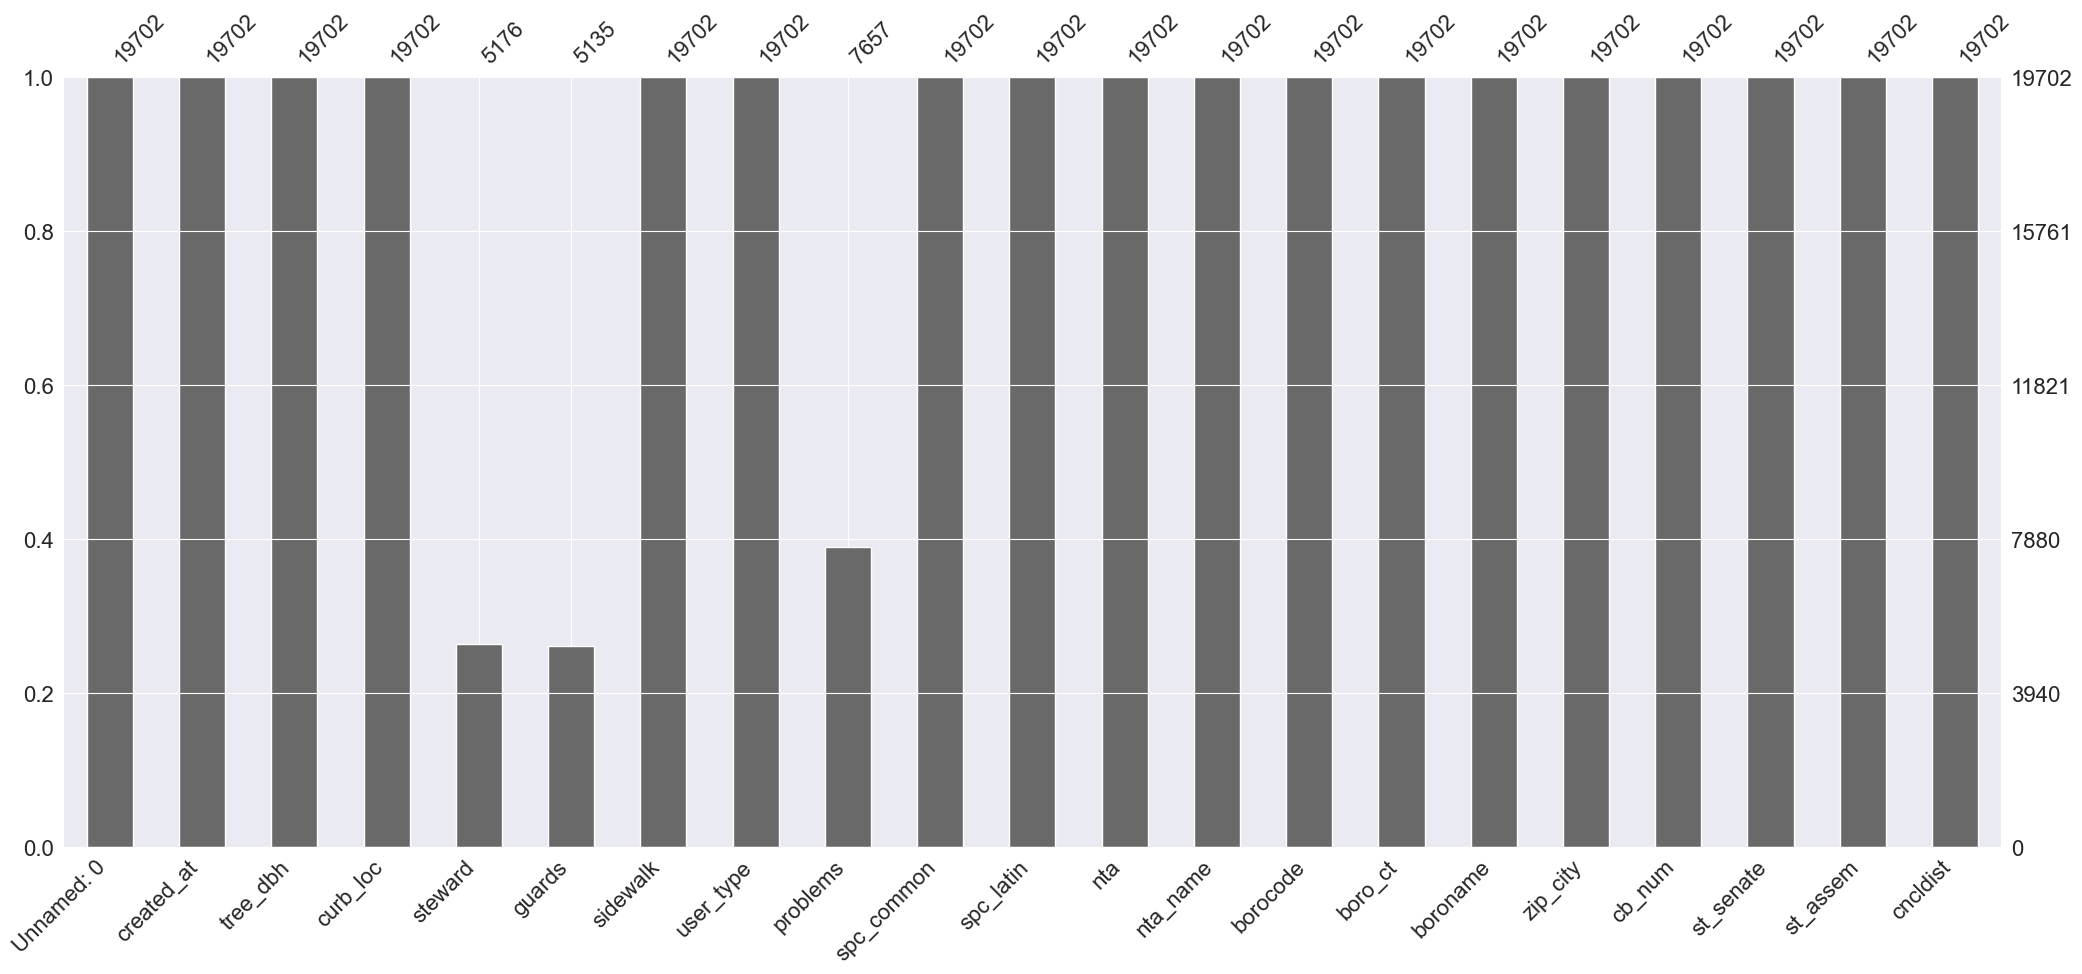

In [12]:
# 테스트 데이터

msno.bar(test)

In [13]:
# 학습데이터와 테스트데이터의 결측값 비율 확인

print(f"학습데이터의 결측값 전체 비율 >\n{train.isna().sum() / len(train) * 100}")

학습데이터의 결측값 전체 비율 >
Unnamed: 0     0.000000
created_at     0.000000
tree_dbh       0.000000
curb_loc       0.000000
health         0.000000
steward       74.474580
guards        74.774820
sidewalk       0.000000
user_type      0.000000
problems      61.264011
spc_common     0.000000
spc_latin      0.000000
nta            0.000000
nta_name       0.000000
borocode       0.000000
boro_ct        0.000000
boroname       0.000000
zip_city       0.000000
cb_num         0.000000
st_senate      0.000000
st_assem       0.000000
cncldist       0.000000
dtype: float64


In [14]:
print(f"테스트데이터의 결측값 전체 비율 >\n{test.isna().sum() / len(test) * 100}")

테스트데이터의 결측값 전체 비율 >
Unnamed: 0     0.000000
created_at     0.000000
tree_dbh       0.000000
curb_loc       0.000000
steward       73.728555
guards        73.936656
sidewalk       0.000000
user_type      0.000000
problems      61.135925
spc_common     0.000000
spc_latin      0.000000
nta            0.000000
nta_name       0.000000
borocode       0.000000
boro_ct        0.000000
boroname       0.000000
zip_city       0.000000
cb_num         0.000000
st_senate      0.000000
st_assem       0.000000
cncldist       0.000000
dtype: float64


In [15]:
# 결측값 확인하기

na_train = train[['steward' , 'guards' , 'problems']]
na_train.head(3)

print(f"steward unique : {na_train['steward'].unique()}")
print(f"guards unique : {na_train['guards'].unique()}")
print(f"problems unique : {na_train['problems'].unique()}")

steward unique : [nan '3or4' '1or2' '4orMore']
guards unique : [nan 'Helpful' 'Harmful' 'Unsure']
problems unique : [nan 'StonesBranchLights' 'Stones' 'BranchLights' 'StonesTrunkOther'
 'StonesWiresRopeBranchLights' 'StonesWiresRope' 'WiresRope' 'MetalGrates'
 'RootOtherTrunkOtherBranchOther' 'StonesTrunkOtherBranchOther'
 'RootOther' 'TrunkOtherBranchLightsBranchOther'
 'MetalGratesRootOtherBranchOther'
 'StonesWiresRopeTrunkLightsBranchLights' 'MetalGratesRootOtherTrunkOther'
 'StonesMetalGrates' 'StonesRootOtherBranchOther' 'StonesRootOther'
 'BranchOther' 'TrunkOther' 'TrunkOtherBranchOther'
 'StonesTrunkOtherBranchLightsBranchOther'
 'StonesRootOtherWiresRopeTrunkOtherBranchLightsBranchOther'
 'StonesBranchOther' 'WiresRopeBranchLights'
 'RootOtherWiresRopeBranchOther' 'TrunkOtherBranchLights'
 'RootOtherWiresRopeTrunkOtherBranchOther' 'StonesRootOtherTrunkOther'
 'MetalGratesBranchOther' 'TrunkLightsBranchLights' 'RootOtherTrunkOther'
 'StonesBranchLightsBranchOther' 'RootOtherBr

In [16]:
na_train_concat = pd.concat([train['user_type'] , na_train] , axis = 1)

na_train_concat.groupby(['user_type']).apply(lambda x : round((x.isna().sum()) / len(x) , 2))

,user_type,steward,guards,problems
user_type,,,,
NYC Parks Staff,0.0,0.80,0.82,0.67
TreesCount Staff,0.0,0.88,0.88,0.68
Volunteer,0.0,0.66,0.66,0.56


In [17]:
# 모델을 통해서 , 변수 중요도 계산 후에 , 컬럼의 결측치 제거에 대한 여부 생각
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from category_encoders import TargetEncoder
from sklearn import metrics

data = train.dropna()
data.drop(['Unnamed: 0'] , axis = 1 , inplace = True)

target = data['health']
data.drop(['health'] , axis = 1 , inplace = True)

data = data[['created_at' , 'tree_dbh' ,'guards' , 'user_type' , 'problems']]

model = RandomForestClassifier()
encoder = TargetEncoder()

print(f"data length : {data.shape[0]}")
print(f"target length : {target.shape[0]}")

data_encoding = encoder.fit_transform(data , target)
x , tx , y ,ty = train_test_split(data_encoding , target , test_size = 0.2 , random_state = 42)

model.fit(x , y)

print(f"Train Data R^2 : {model.score(x , y)}")
print(f"Test Data R^2 : {model.score(tx , ty)}")

# 모델 수행 평가
# 사용 평가 지표는 Mean F1 score 이다.
f1_scorer = metrics.make_scorer(metrics.f1_score , average = 'macro')
mean_f1 = cross_val_score(model , x , y , cv = 10 , scoring = f1_scorer).mean()

print(f"Mean F1 Score : {mean_f1 : .2f}")

data length : 875
target length : 875
Train Data R^2 : 0.9885714285714285
Test Data R^2 : 0.76
Mean F1 Score :  0.47


In [18]:
# Mean F1 Score 계산하는 함수

def mean_f1_score(estimator , x , y):
    f1_scorer = metrics.make_scorer(metrics.f1_score , average = 'macro')
    mean_f1 = cross_val_score(estimator , x , y , cv = 10 , scoring = f1_scorer).mean()
    return mean_f1

In [19]:
# submission

submission = pd.read_csv(path + 'sample_submission.csv' , header = None)
data = test.drop(['Unnamed: 0'] , axis = 1)

data = data[['created_at' , 'tree_dbh' ,'guards' , 'user_type' , 'problems']]
test_encoding = encoder.transform(data)

prediction = model.predict(test_encoding)

submission[1] = prediction

<Axes: ylabel='None'>

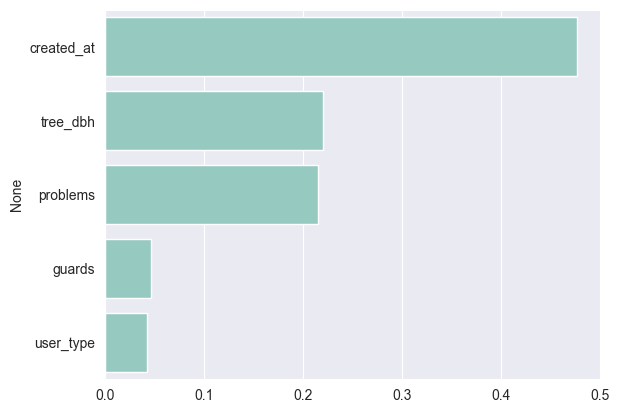

In [20]:
# 변수 중요도를 판단

feature_importance = model.feature_importances_
feature_importance = pd.Series(
    feature_importance ,
    index = x.columns
)
fi = feature_importance.sort_values(ascending = False)

sns.barplot(
    x = fi.values ,
    y = fi.index
)

In [21]:
# BaseLine Model Submission

submission.to_csv(path + 'submission.csv' , index = False)

In [22]:
# steward , guards는 모델의 성능에 영향을 잘 안 미치는 듯 해서 삭제

train.drop(['steward'] , axis = 1 , inplace = True)
test.drop(['steward'] , axis = 1 , inplace = True)

In [23]:
# guards , problems 모델 기반 처리
# RandomForestClassifier 사용해서 모델 기반 처리
# 결측값이 없는 다른 데이터를  토대로 결측값 열을 예측하는 방법을 사용

target = train['health']
data = train.drop(['Unnamed: 0' , 'health' , 'guards' , 'problems'] , axis = 1)

data[data.select_dtypes('object').columns] = encoder.fit_transform(data[data.select_dtypes('object').columns] , target)

model = RandomForestClassifier()
data = pd.concat([data , train['guards']] , axis = 1)

df_missing = data[data['guards'].isnull()]
df_not_missing = data.dropna(subset = ['guards'])

model.fit(df_not_missing.drop(columns = ['guards']) , df_not_missing['guards'])

predicted_values = model.predict(df_missing.drop(columns = ['guards']))
data.loc[data['guards'].isnull() , 'guards'] = predicted_values

train['guards'] = data['guards']

In [24]:
data = test.drop(['Unnamed: 0' , 'guards' , 'problems'] , axis = 1)

data[data.select_dtypes('object').columns] = encoder.transform(data[data.select_dtypes('object').columns])

model = RandomForestClassifier()
data = pd.concat([data , test['guards']] , axis = 1)

df_missing = data[data['guards'].isnull()]
df_not_missing = data.dropna(subset = ['guards'])

model.fit(df_not_missing.drop(columns = ['guards']) , df_not_missing['guards'])

predicted_values = model.predict(df_missing.drop(columns = ['guards']))
data.loc[data['guards'].isnull() , 'guards'] = predicted_values

test['guards'] = data['guards']

In [25]:
data = train.drop(['Unnamed: 0' , 'health' , 'problems'] , axis = 1)

data[data.select_dtypes('object').columns] = encoder.fit_transform(data[data.select_dtypes('object').columns] , target)

model = RandomForestClassifier()
data = pd.concat([data , train['problems']] , axis = 1)

df_missing = data[data['problems'].isnull()]
df_not_missing = data.dropna(subset = ['problems'])

model.fit(df_not_missing.drop(columns = ['problems']) , df_not_missing['problems'])

predicted_values = model.predict(df_missing.drop(columns = ['problems']))
data.loc[data['problems'].isnull() , 'problems'] = predicted_values

train['problems'] = data['problems']

In [26]:
data = test.drop(['Unnamed: 0' , 'problems'] , axis = 1)

data[data.select_dtypes('object').columns] = encoder.transform(data[data.select_dtypes('object').columns])

model = RandomForestClassifier()
data = pd.concat([data , test['problems']] , axis = 1)

df_missing = data[data['problems'].isnull()]
df_not_missing = data.dropna(subset = ['problems'])

model.fit(df_not_missing.drop(columns = ['problems']) , df_not_missing['problems'])

predicted_values = model.predict(df_missing.drop(columns = ['problems']))
data.loc[data['problems'].isnull() , 'problems'] = predicted_values

test['problems'] = data['problems']

### 이상치 파악

5.0
17.0
train data outlier percentage : 0.33526821457165734%


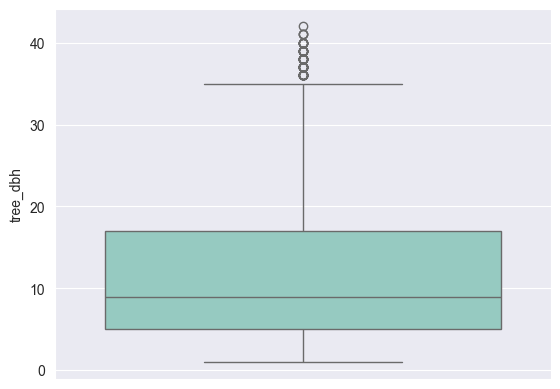

In [27]:
# tree_dbh 파악하면 될듯 하다

data = train['tree_dbh']

sns.boxplot(
    data
)

# tukey 방식을 사용해서 outlier의 비율 살펴보기

q1 = np.percentile(train['tree_dbh'] , 25)
q3 = np.percentile(train['tree_dbh'] , 75)

print(q1)
print(q3)

IQR = q3 - q1

upper_fence = q3 + 1.5 * IQR
lower_fence = q1 - 1.5 * IQR

print(f"train data outlier percentage : {len(train[(train['tree_dbh'] < lower_fence) | (train['tree_dbh'] > upper_fence)]) / len(train) * 100}%")

### EDA

In [28]:
# 데이터 타입 나누기
# 해당 데이터에서는 object , int 두가지가 있다.

int_data = train.select_dtypes('int')
obj_data = train.select_dtypes('object')

### Int Data

In [29]:
int_data.head(3)

,Unnamed: 0,tree_dbh,health,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
0,0,14,1,4,4152901,411,11,25,23
1,1,5,1,2,2039901,207,33,78,15
2,2,26,2,5,5017011,503,24,62,51


<Axes: xlabel='health', ylabel='count'>

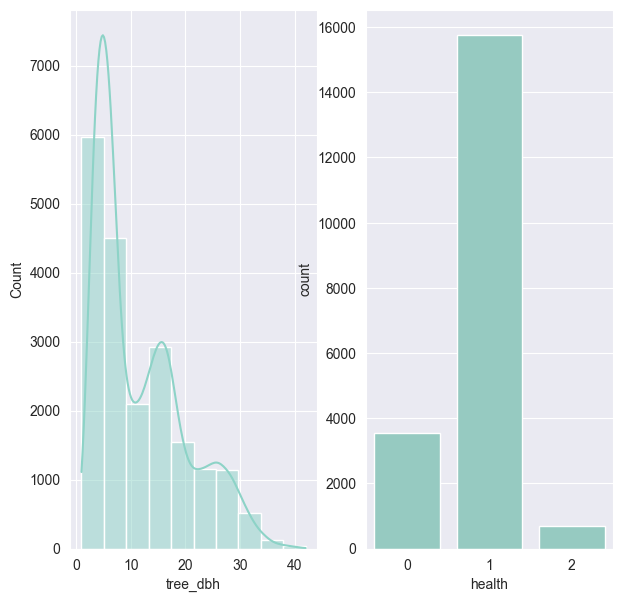

In [30]:
# 분석 대상 데이터

cols = ['tree_dbh' , 'health']

fit , ax = plt.subplots(1 , 2 , figsize = (7 , 7))

sns.histplot(
    x = int_data[cols[0]] ,
    ax = ax[0] ,
    bins = 10 ,
    kde = True
)

sns.countplot(
    x = int_data[cols[1]] ,
    ax = ax[1]
)

In [31]:
# 변수간의 상관관계
# 순서형 데이터이기에 , 비모수적 방식으로 접근을 해야한다. -> 스피어만 상관계수

rows = []
p_rows = []
for var1 in int_data.drop(['Unnamed: 0' , 'health'] , axis = 1):
    cols = []
    p_cols = []
    for var2 in int_data.drop(['Unnamed: 0' , 'health'] , axis = 1):
        value , p = scipy.stats.spearmanr(int_data[var1] , int_data[var2])
        cols.append(value)
        p_cols.append(p)
    rows.append(cols)
    p_rows.append(p_cols)

spear_result = np.array(rows)
spear_df = pd.DataFrame(spear_result , columns = int_data.drop(['Unnamed: 0' , 'health'] , axis = 1).columns , index = int_data.drop(['Unnamed: 0' , 'health'] , axis = 1).columns)

p_result = np.array(p_rows)
p_df = pd.DataFrame(p_result , columns = int_data.drop(['Unnamed: 0' , 'health'] , axis = 1).columns , index = int_data.drop(['Unnamed: 0' , 'health'] , axis = 1).columns)

<Axes: >

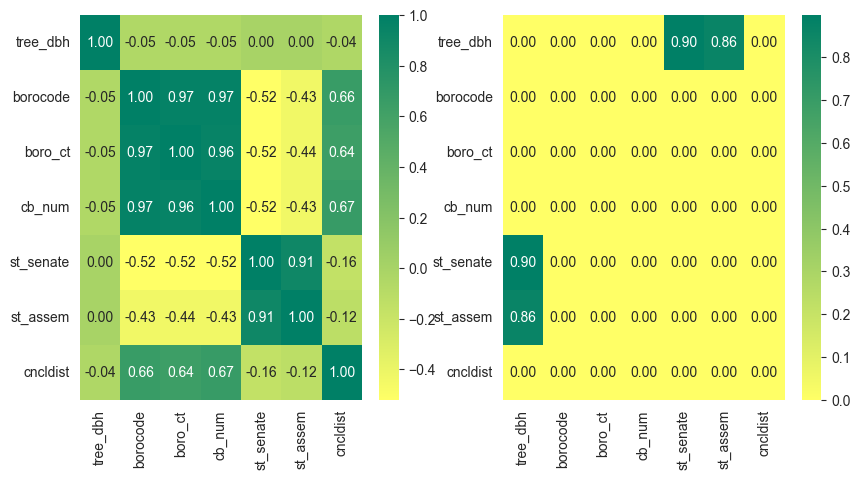

In [32]:
# 시각화

fig , ax = plt.subplots(1 , 2 , figsize = (10 , 5))
sns.heatmap(
    spear_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[0]
)
sns.heatmap(
    p_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[1]
)

In [33]:
"""
장소를 나타내는 데이터는 따로 보관
"""

location_cols = ['borocode' , 'boro_ct' , 'cb_num' , 'st_senate' , 'st_assem' , 'cncldist']

int_data[location_cols]

# borocode , st_senate 사용

,borocode,boro_ct,cb_num,st_senate,st_assem,cncldist
0,4,4152901,411,11,25,23
1,2,2039901,207,33,78,15
2,5,5017011,503,24,62,51
3,5,5024401,503,24,62,51
4,1,1022102,110,30,70,9
...,...,...,...,...,...,...
19979,5,5018100,502,24,62,50
19980,5,5020804,503,24,62,51
19981,5,5017010,503,24,62,51
19982,1,1031704,101,26,65,1


### Object Data

In [34]:
obj_data.head(3)

,created_at,curb_loc,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,boroname,zip_city
0,2015-06-29,OnCurb,Helpful,Damage,Volunteer,MetalGratesRootOtherTrunkOther,English oak,Quercus robur,QN45,Douglas Manor-Douglaston-Little Neck,Queens,Little Neck
1,2016-09-21,OnCurb,Helpful,NoDamage,Volunteer,StonesBranchLights,crimson king maple,Acer platanoides 'Crimson King',BX05,Bedford Park-Fordham North,Bronx,Bronx
2,2015-09-13,OnCurb,Helpful,NoDamage,Volunteer,StonesBranchLights,English oak,Quercus robur,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,Staten Island


In [35]:
# 위치나 장소를 나타내는 데이터를 따로 둔다.

locate = ['nta' , 'nta_name' , 'boroname' , 'zip_city']
locate_data = obj_data[locate]

data = obj_data[['curb_loc' , 'guards' , 'sidewalk' , 'user_type' , 'problems' , 'spc_common' , 'spc_latin']]

data.head(4)

,curb_loc,guards,sidewalk,user_type,problems,spc_common,spc_latin
0,OnCurb,Helpful,Damage,Volunteer,MetalGratesRootOtherTrunkOther,English oak,Quercus robur
1,OnCurb,Helpful,NoDamage,Volunteer,StonesBranchLights,crimson king maple,Acer platanoides 'Crimson King'
2,OnCurb,Helpful,NoDamage,Volunteer,StonesBranchLights,English oak,Quercus robur
3,OnCurb,Helpful,Damage,NYC Parks Staff,BranchLights,honeylocust,Gleditsia triacanthos var. inermis


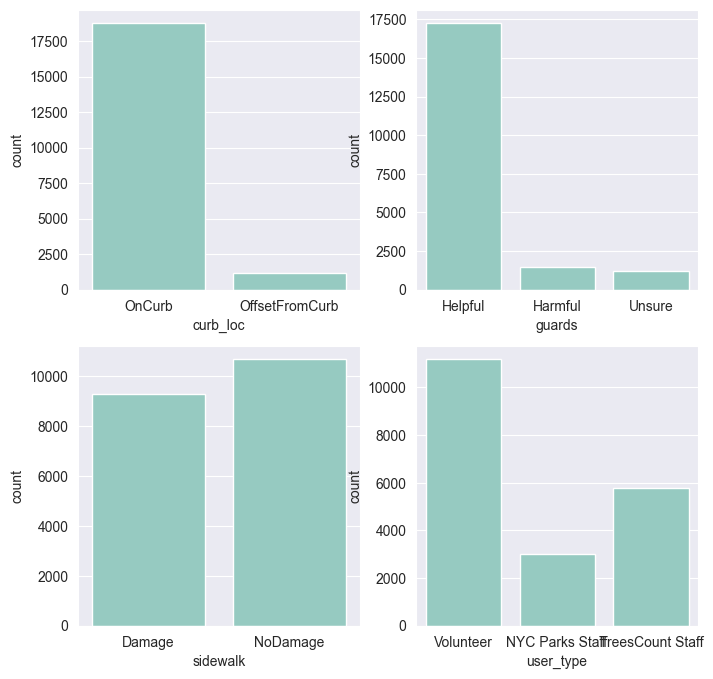

In [36]:
# 빈도 분석

fig , ax = plt.subplots(2 , 2 , figsize = (8 , 8))

for i in range(4):
    row = i // 2
    col = i % 2

    sns.countplot(
        x = data[data.columns[i]] ,
        ax = ax[row][col]
    )

<Axes: ylabel='spc_common'>

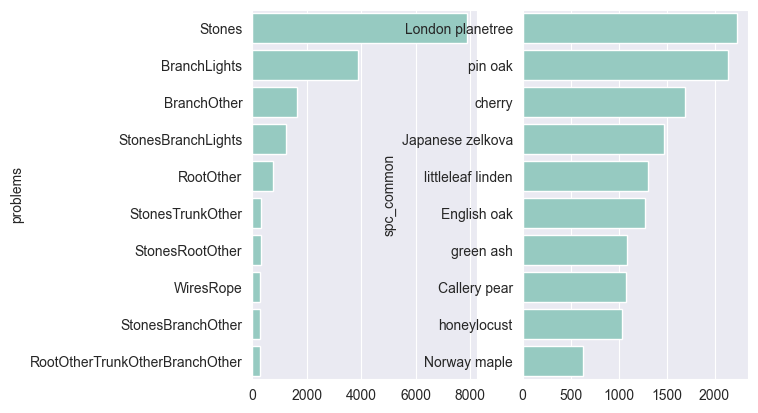

In [37]:
# 카디널리티가 높은 애들은 TOP 10 시각화 해서 파악

data = obj_data[['problems' , 'spc_common']]

prob = data['problems'].value_counts().sort_values(ascending = False)
spc_c = data['spc_common'].value_counts().sort_values(ascending = False)

fig , ax = plt.subplots(1 , 2)
sns.barplot(
    y = prob.index[:10] ,
    x = prob.values[:10] ,
    ax = ax[0]
)

sns.barplot(
    y = spc_c.index[:10] ,
    x = spc_c.values[:10] ,
    ax = ax[1]
)

In [38]:
# 장소 데이터들은 다 필요한가?

# Cramer's V 방식을 사용해서 상관관계를 파악

def cramers_V(var1 , var2):
    crosstab = np.array(pd.crosstab(var1 , var2 , rownames = None , colnames = None))
    stat = scipy.stats.chi2_contingency(crosstab)[0]
    p_value = scipy.stats.chi2_contingency(crosstab)[1]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return np.sqrt(stat / (obs * mini)) , p_value

rows = []
p_rows = []
for var1 in locate_data:
    cols = []
    p_cols = []
    for var2 in locate_data:
        cramers , p = cramers_V(locate_data[var1] , locate_data[var2])
        cols.append(round(cramers , 2))
        p_cols.append(p)
    rows.append(cols)
    p_rows.append(p_cols)

cramers_result = np.array(rows)
cramer_df = pd.DataFrame(cramers_result , columns = locate_data.columns , index = locate_data.columns)

<Axes: >

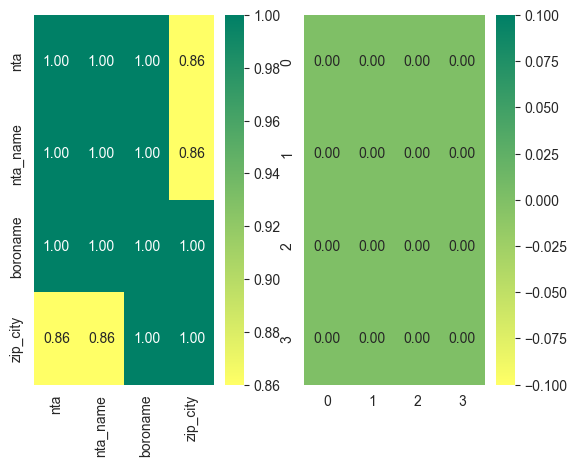

In [39]:
# 두개 시각화

"""
모델의 학습에 과연 지역 데이터는 도움이 되는가?
-> 추가 데이터를 결합할 때 , 사용은 가능할 것 같다.
"""

# nta , nta_name 둘중 하나만 하면 될듯
# 최종적으로 nta_name , boroname , zip_city 삭제

fig , ax = plt.subplots(1 , 2)
sns.heatmap(
    cramer_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[0]
)
sns.heatmap(
    p_rows ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[1]
)

In [72]:
# 데이터 정리하기

train = train[['created_at' , 'tree_dbh' , 'curb_loc' , 'health' , 'guards' , 
               'sidewalk' , 'user_type' , 'problems' , 'spc_common' , 'nta']]

test = test[['created_at' , 'tree_dbh' , 'curb_loc' , 'guards' , 
             'sidewalk' , 'user_type' , 'problems' , 'spc_common' , 'nta']]

### 변수 간 관계성

<Axes: >

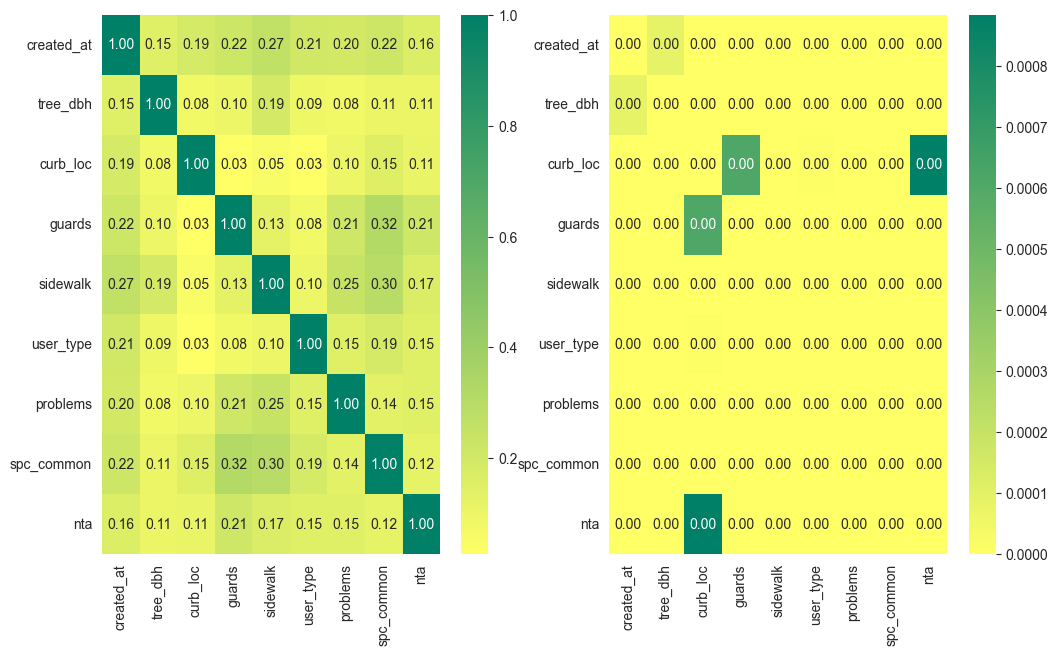

In [62]:
data = train.drop(['health'] , axis = 1)

rows = []
p_rows = []
for var1 in data:
    cols = []
    p_cols = []
    for var2 in data:
        c , p = cramers_V(data[var1] , data[var2])
        cols.append(c) ; p_cols.append(p)
    rows.append(cols)
    p_rows.append(p_cols)

c_df = pd.DataFrame(rows , columns = data.columns , index = data.columns)
p_df = pd.DataFrame(p_rows , columns = data.columns , index = data.columns)

fig , ax = plt.subplots(1 , 2 , figsize = (12 , 7))
sns.heatmap(
    c_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[0]
)
sns.heatmap(
    p_df ,
    annot = True ,
    fmt = '.2f' ,
    cmap = 'summer_r' ,
    ax = ax[1]
)

### Test Modeling (using Keras , develop the multi layer perceptron model)

In [79]:
target = train['health']
train_df = train.drop(['health'] , axis = 1)
test_df = test.copy()

object_cols = train.select_dtypes('object').columns

for col in object_cols:
    encoder = TargetEncoder(cols = [col])
    train_df[col] = encoder.fit_transform(train_df[col] , target)
    test_df[col] = encoder.transform(test_df[col])

In [82]:
# 데이터셋 분할

trainX , validX , trainY , validY = train_test_split(train_df , target , test_size = 0.2 , random_state = 42)

In [88]:
# 모델 구성

from keras.models import Sequential
from keras.layers import Dense , Activation

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed